In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/heart-rate/Heart_pre.csv')
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,True,True,False,0
1,1,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,True,True,False,1
2,2,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,True,True,True,1
3,3,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,True,True,False,1
4,4,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,True,True,True,0


In [9]:
df.dtypes

Unnamed: 0       int64
age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [10]:
df.describe()

,Unnamed: 0,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,69977.000000,69971.000000,69968.000000,69977.000000,69973.000000,70000.000000
mean,34999.500000,19468.755505,164.359392,74.206027,128.816540,96.635645,0.499700
std,20207.403759,2467.361127,8.210368,14.395954,154.036338,188.508610,0.500003
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,17499.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,34999.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,52499.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,69999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


In [11]:
df.isnull().sum()

Unnamed: 0      0
age            23
gender         35
height         29
weight         32
ap_hi          23
ap_lo          27
cholesterol    31
gluc           29
smoke          22
alco           38
active         20
cardio          0
dtype: int64

In [16]:
# Assuming 'df' is your DataFrame
# Separate numeric and non-numeric (categorical) columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if the missing values have been filled
print(df.isnull().sum())



Unnamed: 0     0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


/tmp/ipykernel_30/1231403865.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


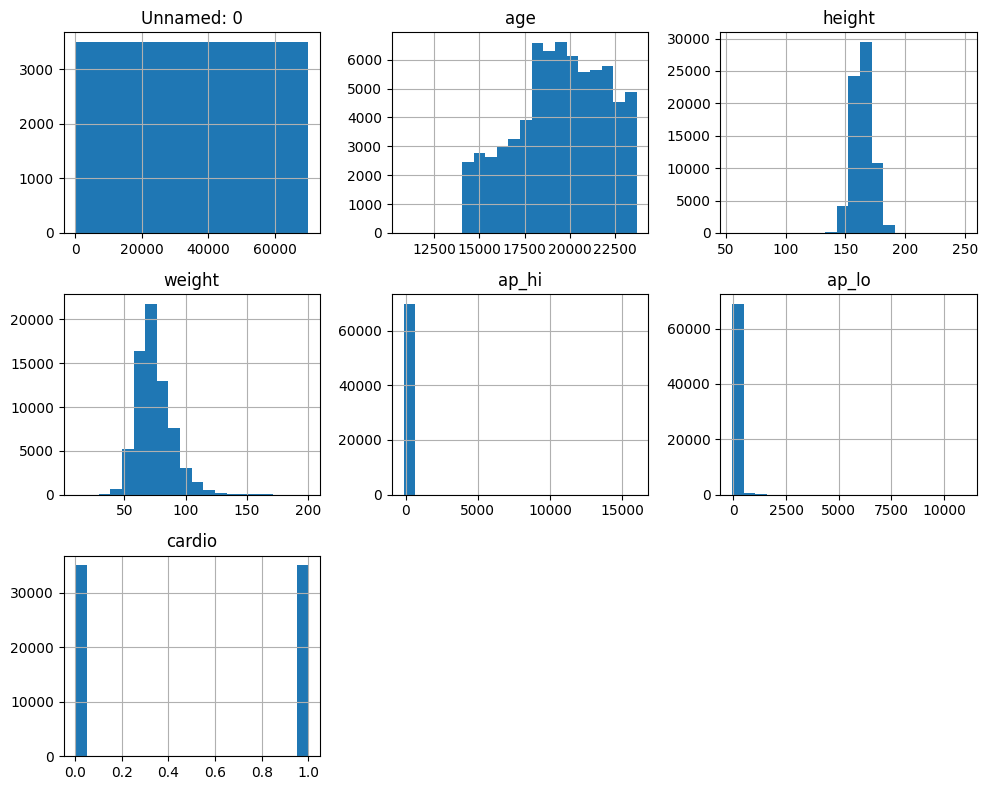

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

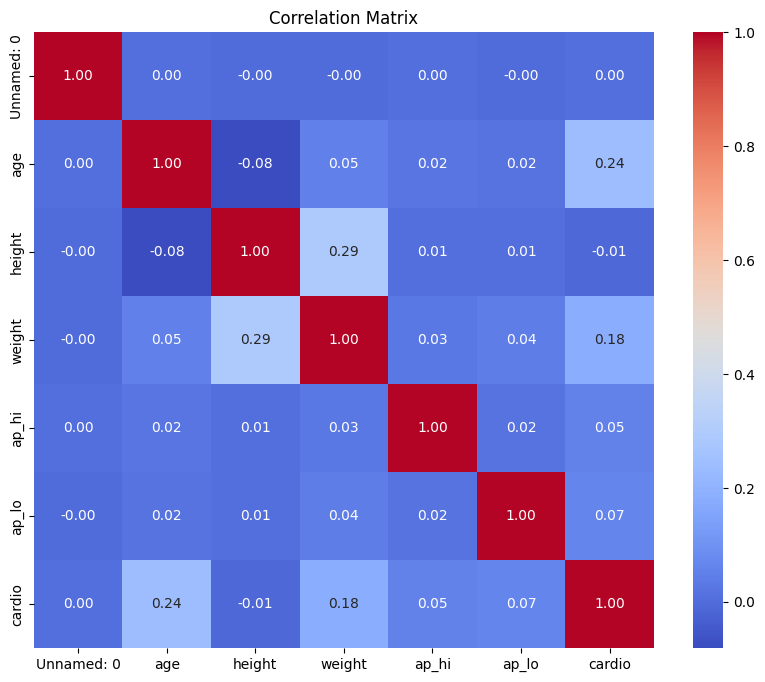

In [19]:
# Remove non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

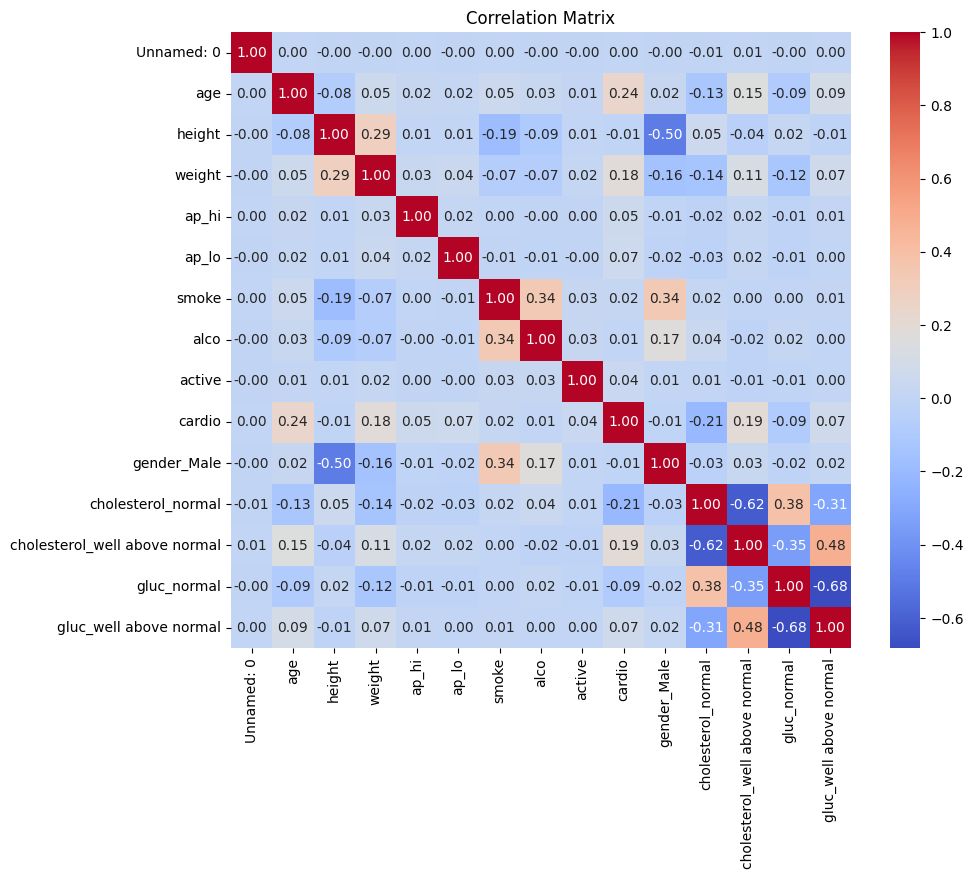

In [20]:
# Convert categorical columns to numeric using one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [22]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


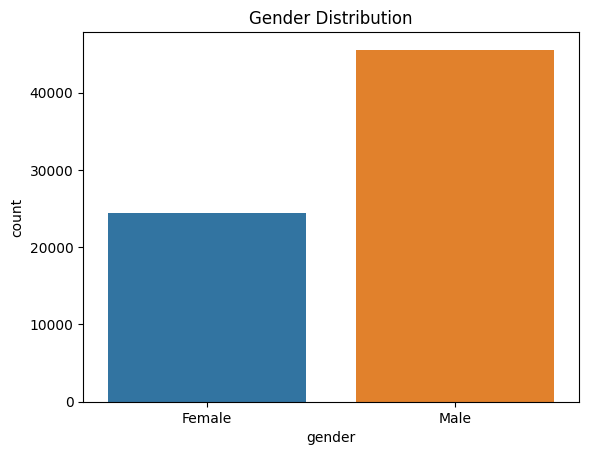

In [23]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

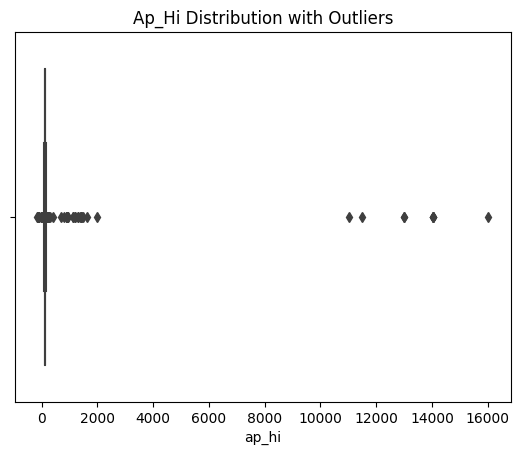

In [27]:
sns.boxplot(x=df['ap_hi'])
plt.title('Ap_Hi Distribution with Outliers')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


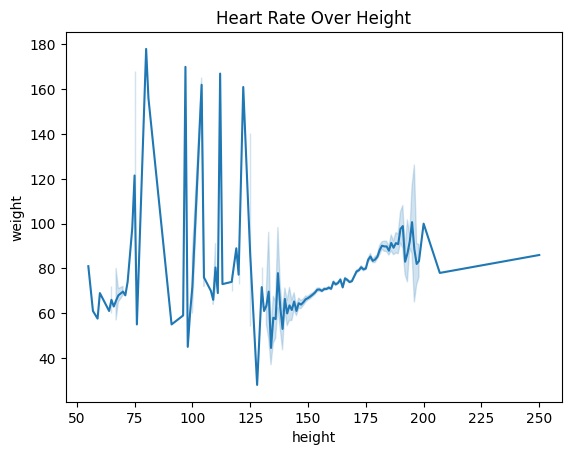

In [28]:
#1-Heart Rate over Height:
sns.lineplot(x='height', y='weight', data=df)
plt.title('Heart Rate Over Height')
plt.show()



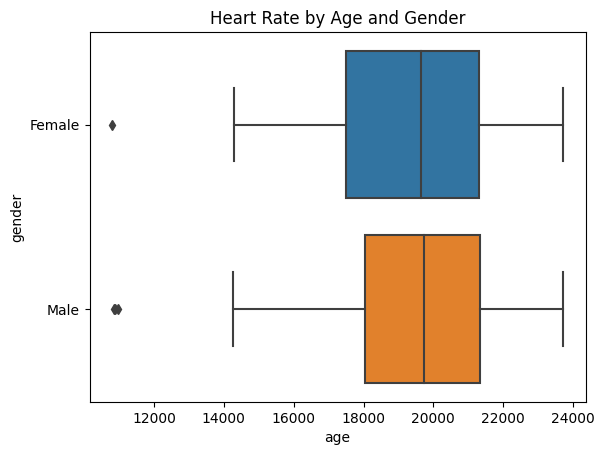

In [35]:
#2-Heart Rate by Age and Gender:
sns.boxplot(x='age', y='gender', data=df)
plt.title('Heart Rate by Age and Gender')
plt.show()